In [1]:
import numpy as np

# Image

In [26]:
size = 1
MAX_VALUE = 255
MIN_VALUE = 0
IMAGE_SIZE_X = 20
IMAGE_SIZE_Y = 20
xCenter = IMAGE_SIZE_X/2
yCenter = IMAGE_SIZE_Y/2
l = 1

#I = np.ceil((MAX_VALUE - MIN_VALUE) * np.random.rand(size) + MIN_VALUE)
#Cx = np.ceil((IMAGE_SIZE_X)/2 + SIGMA*np.random.randn(size)).astype('int')
#Cx = np.clip(Cx,0,IMAGE_SIZE_X)
#Cy = np.ceil((IMAGE_SIZE_Y)/2 +  SIGMA*np.random.randn(size)).astype('int')
#Cy = np.clip(Cy,0,IMAGE_SIZE_Y)

I = np.array([180])
Cx = np.array([3])
Cy = np.array([4])

minI = np.min(I)
argminI = np.argmin(I)
maxI = np.max(I)
argmaxI = np.argmax(I)

print('min I: %s at (%s,%s)\n' \
      'max I: %s at (%s,%s)\n' % (minI, Cx[argminI], Cy[argminI],
                                  maxI, Cx[argmaxI], Cy[argmaxI]))

min I: 180 at (3,4)
max I: 180 at (3,4)



In [27]:
from modelfunctions import psi

G_SIZE =  1000
x = np.linspace(0,IMAGE_SIZE_X,G_SIZE) - xCenter
y = np.linspace(0,IMAGE_SIZE_Y,G_SIZE) - yCenter
G = np.zeros([G_SIZE, G_SIZE])

for i in range(G_SIZE):
    for j in range(G_SIZE):
        G[i,j] = I*psi(x[i],y[j],l,Cx,Cy)
        
G_fft = np.fft.fft2(G)
G_fft = np.fft.fftshift(G_fft)

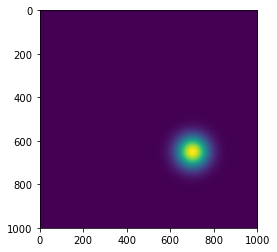

In [28]:
import matplotlib.pyplot as plt

plt.imshow(G)
plt.show()

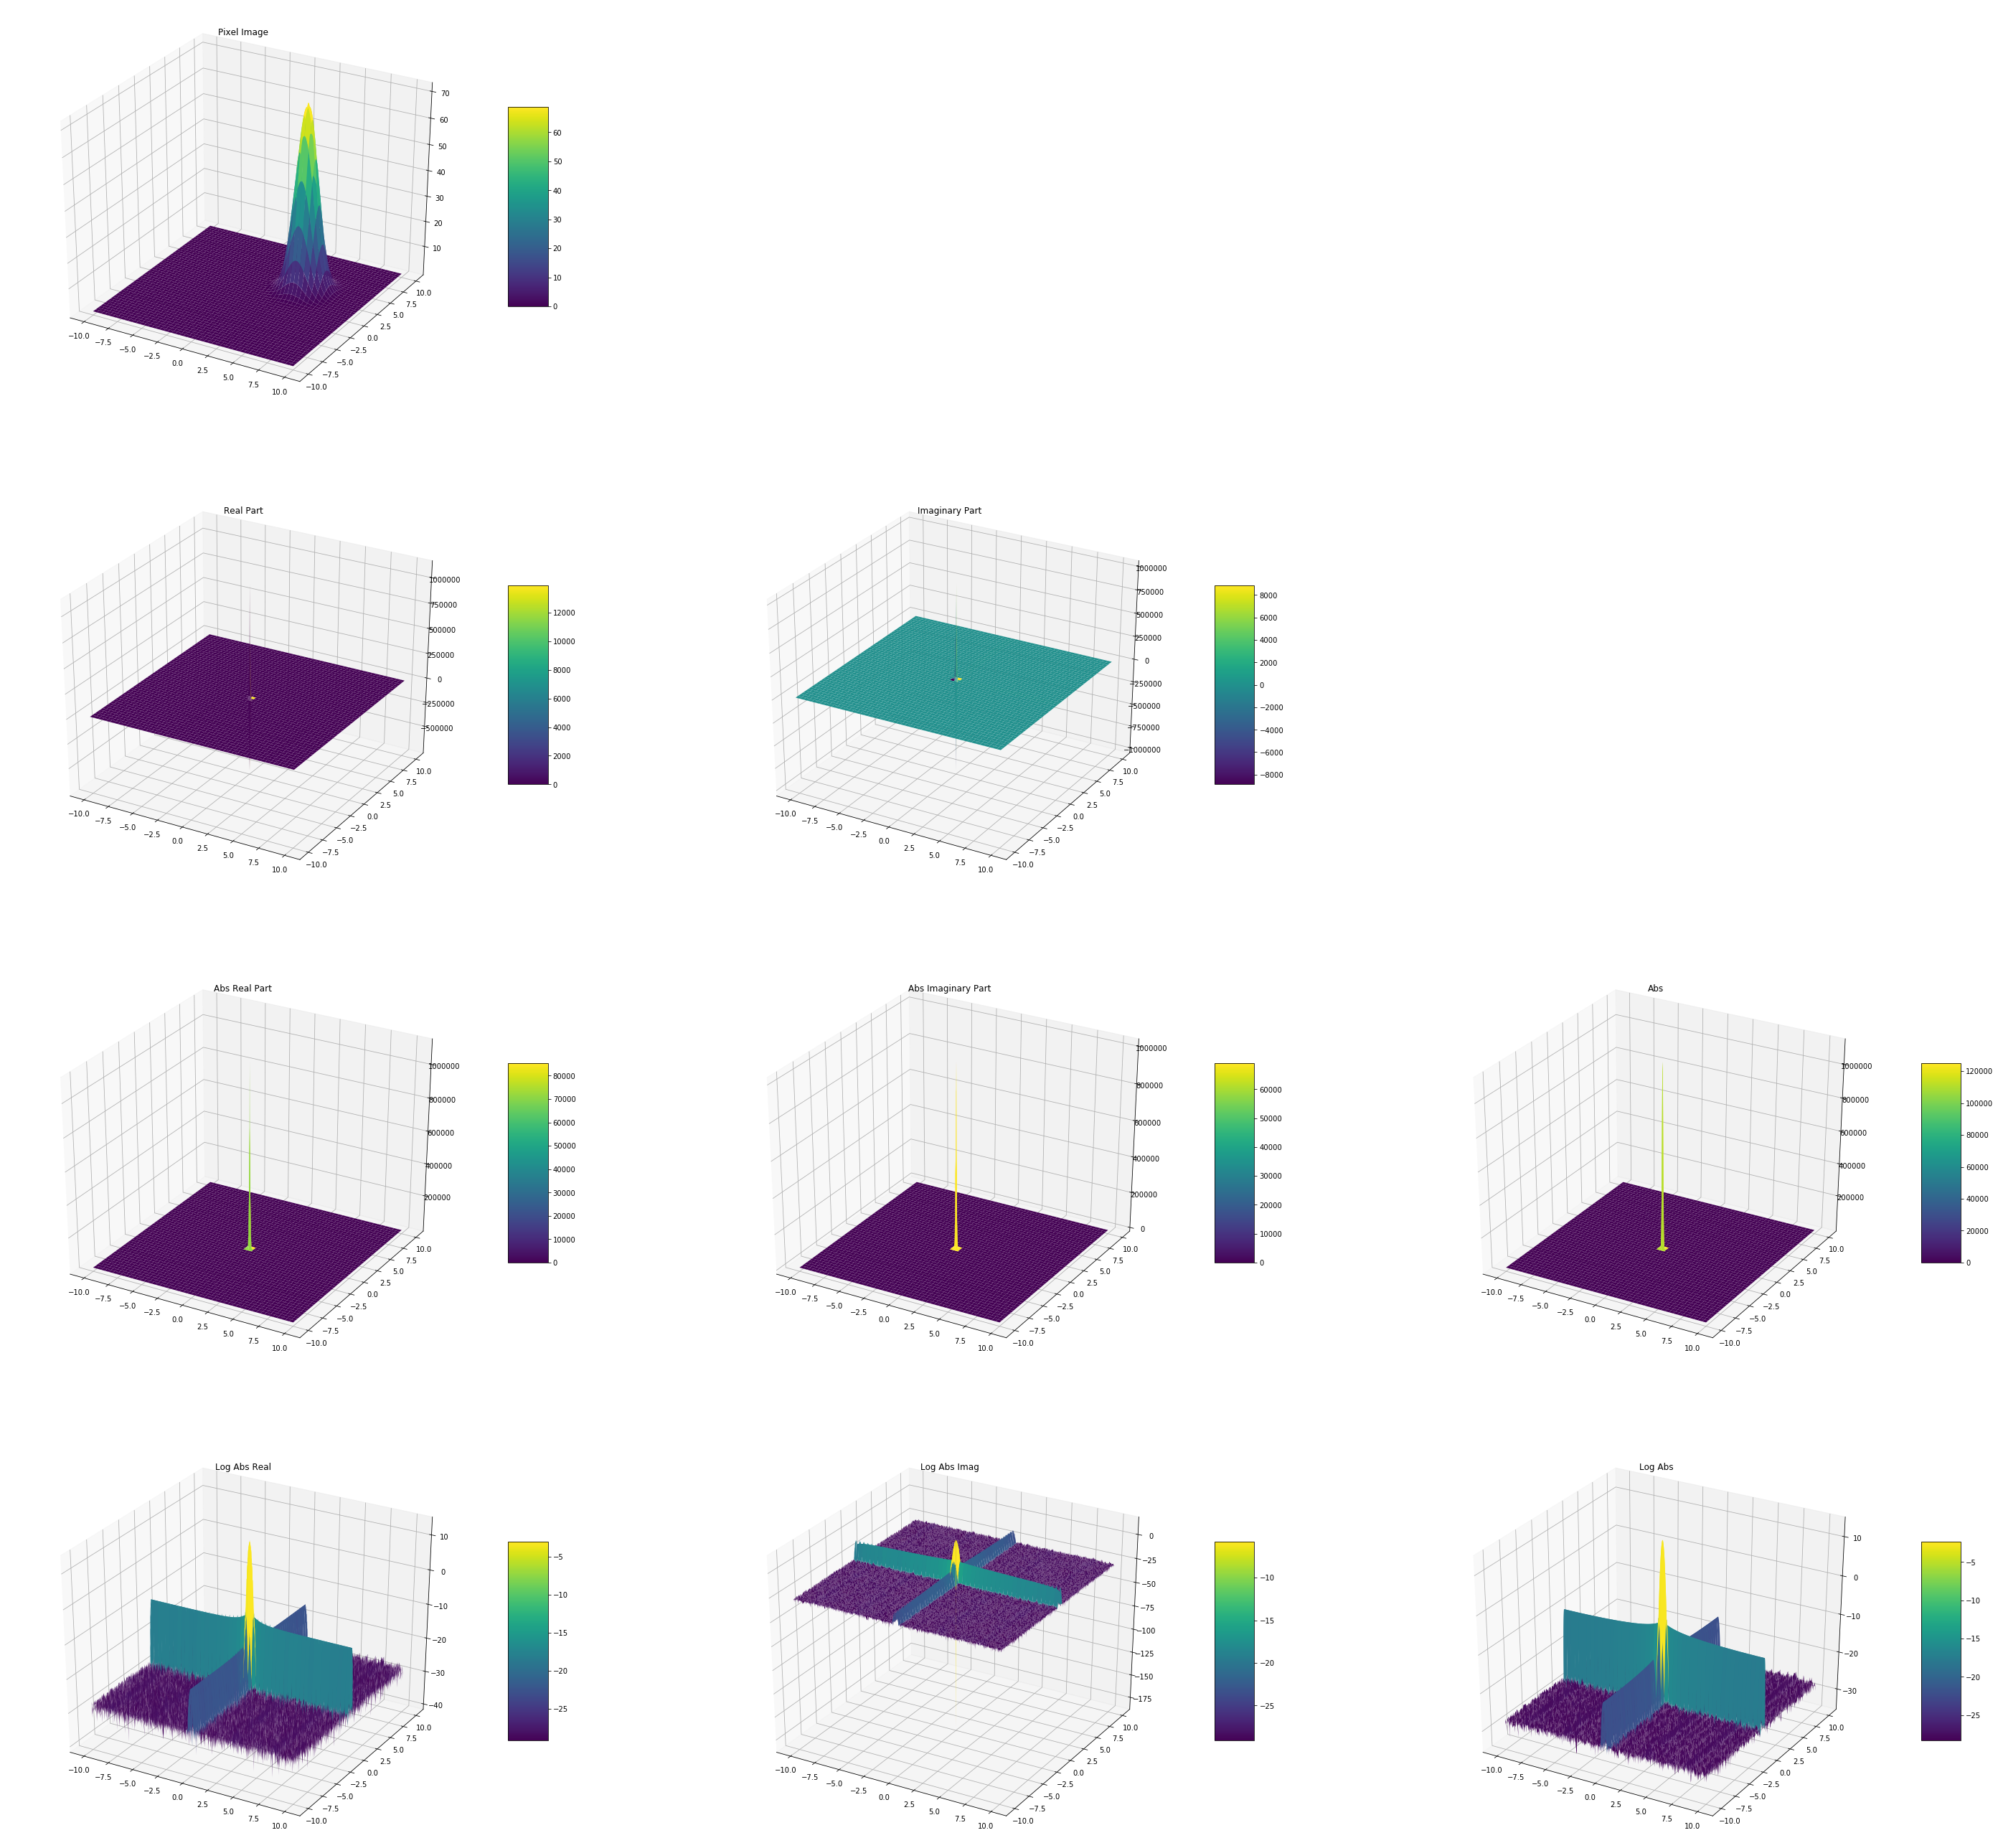

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 3D plotting
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(4, 3, 1, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, G, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Pixel Image")

####
####

# 3D plotting
ax = fig.add_subplot(4, 3, 4, projection='3d')

## Plot the surface.
surf = ax.plot_surface(X, Y, G_fft.real, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 5, projection='3d')
## Plot the surface
surf = ax.plot_surface(X, Y, G_fft.imag, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Imaginary Part")

#####

# 3D plotting
ax = fig.add_subplot(4, 3, 7, projection='3d')

G_real_abs_fft = np.sqrt(G_fft.real**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 8, projection='3d')
G_imag_abs_fft = np.sqrt(G_fft.imag**2)
## Plot the surface
surf = ax.plot_surface(X, Y, G_imag_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Imaginary Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 9, projection='3d')

G_abs_fft = np.sqrt(G_fft.real**2+G_fft.imag**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs")
                    
# 3D plotting
ax = fig.add_subplot(4, 3, 10, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_fft.real**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Real")

# 3D plotting
ax = fig.add_subplot(4, 3, 11, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_fft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Imag")

# 3D plotting
ax = fig.add_subplot(4, 3, 12, projection='3d')

G_log_abs_fft = np.log(np.sqrt(G_fft.real**2+G_fft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_log_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs")  

fig.set_figheight(47)
fig.set_figwidth(50)



plt.savefig('Fourier_test.pdf', format='pdf')
plt.show(fig)

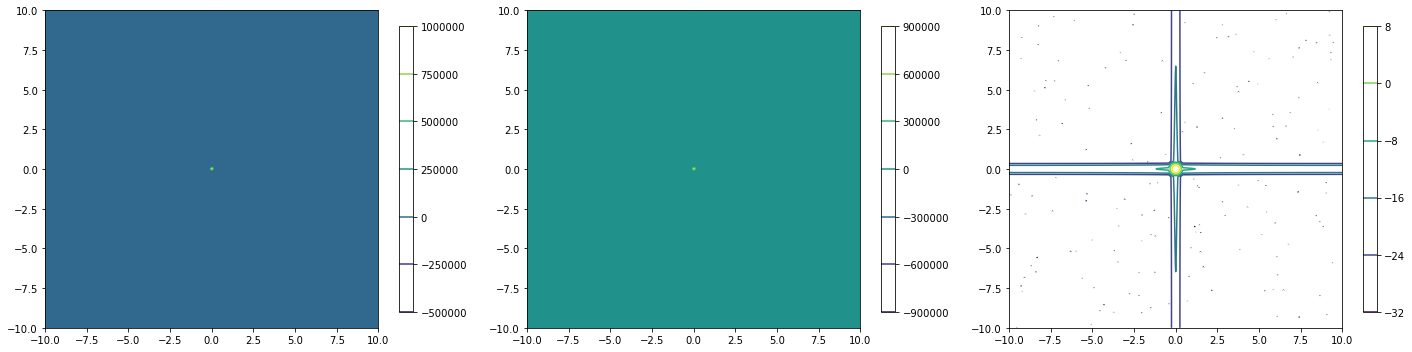

In [30]:
fig, ax = plt.subplots(1,3)

my_countor = ax[0].contour(X,Y,G_fft.real,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[0], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[1].contour(X,Y,G_fft.imag,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[1], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[2].contour(X,Y,np.log(np.abs(G_fft)),
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[2], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

fig.set_figheight(5)
fig.set_figwidth(20)
plt.tight_layout()

plt.show(fig)

# Model

In [46]:
from scipy.special import erf

In [56]:
##Normalization function
def nnorm(x,C,l):
    return 1+erf(np.sqrt(1.0/(np.sqrt(2)*l**2))*(C+2*1j*l**2*np.pi*x))

# Real part of basis function
def phi(u, v, l, Cx, Cy):
    return np.exp(-2*np.pi**2*(u*u+v*v)*l**2)*np.exp(2*np.pi*1j*(Cx*u+Cy*v))

In [57]:
G_fft_model = np.zeros((G_SIZE,G_SIZE),dtype=np.complex128)

x = np.linspace(0,IMAGE_SIZE_X,G_SIZE) - xCenter
y = np.linspace(0,IMAGE_SIZE_Y,G_SIZE) - yCenter

for i in range(G_SIZE):
    for j in range(G_SIZE):
        G_fft_model[i,j] = I*l*np.sqrt(np.pi/2)*phi(x[i],y[j],l,Cx,Cy)

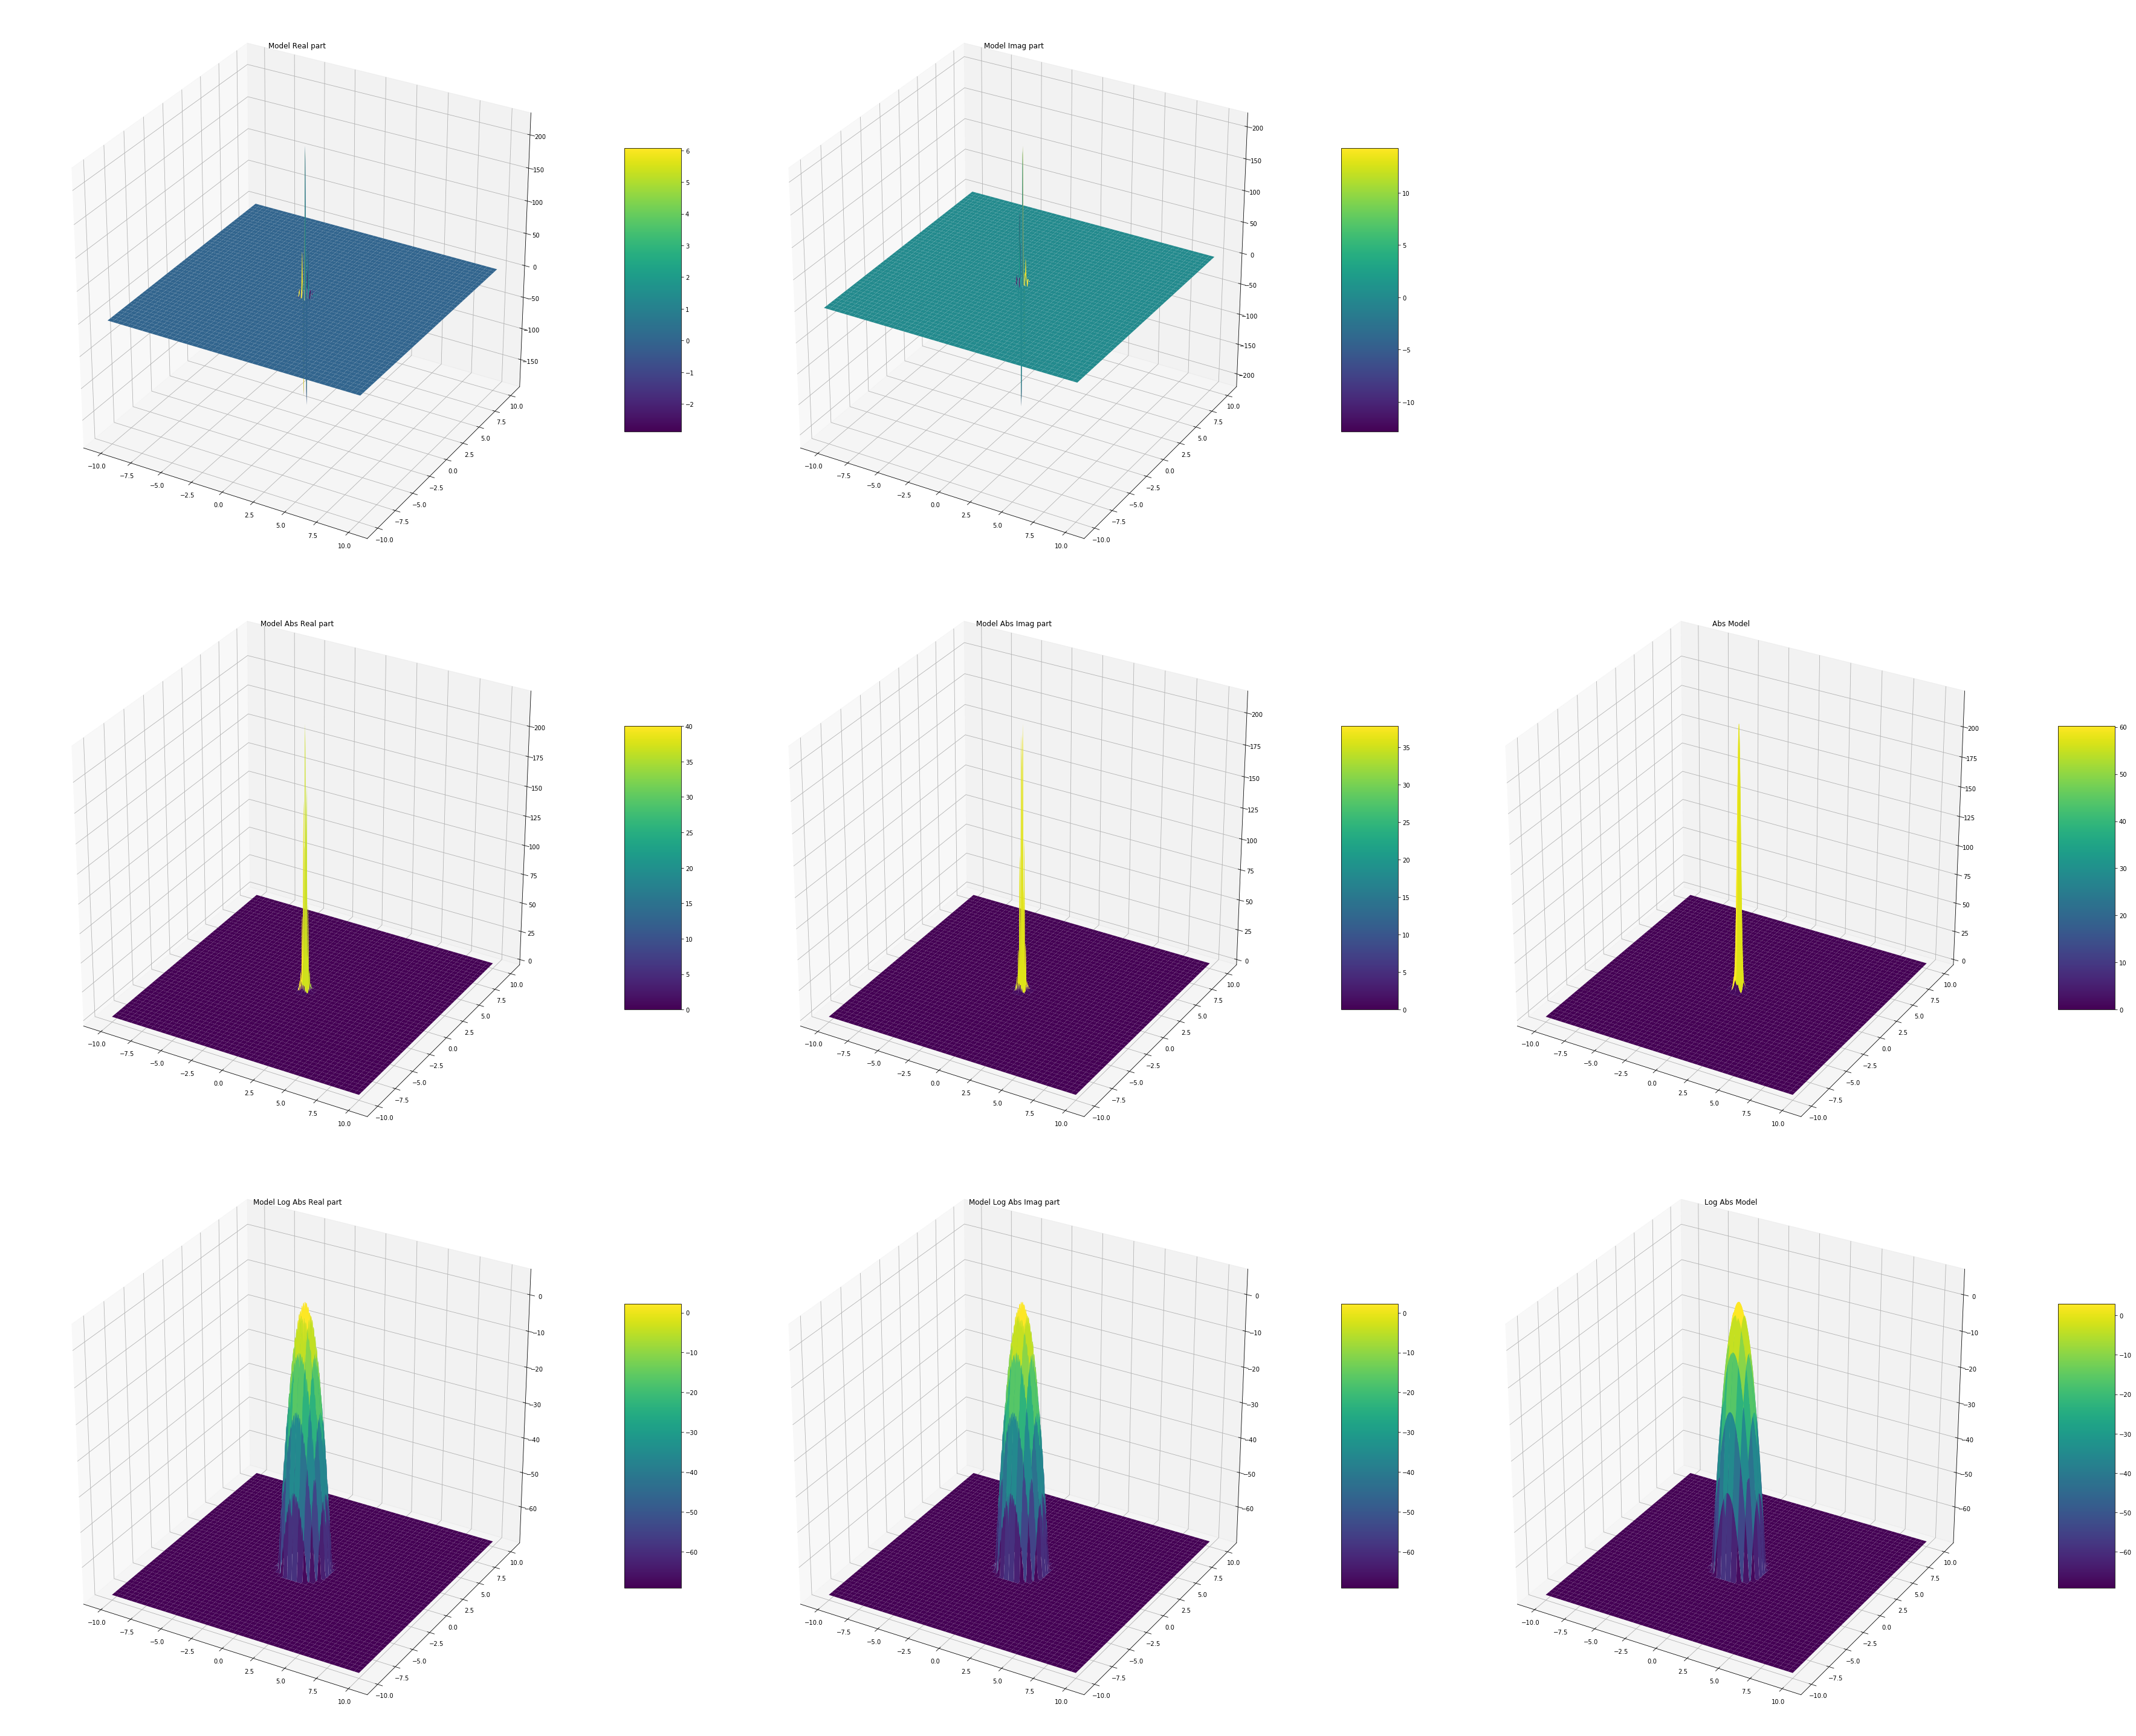

In [58]:
# 3D plotting
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(3, 3, 1, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_fft_model.real, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Real part")

####
####

# 3D plotting
ax = fig.add_subplot(3, 3, 2, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_fft_model.imag, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Imag part")

####

# 3D plotting
ax = fig.add_subplot(3, 3, 4, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.abs(G_fft_model.real), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Abs Real part")

# 3D plotting
ax = fig.add_subplot(3, 3, 5, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.abs(G_fft_model.imag), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Abs Imag part")

# 3D plotting
ax = fig.add_subplot(3, 3, 6, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.abs(G_fft_model), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Model")


# 3D plotting
ax = fig.add_subplot(3, 3, 7, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.log(np.abs(G_fft_model.real)+10**(-30)), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Log Abs Real part")

# 3D plotting
ax = fig.add_subplot(3, 3, 8, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.log(np.abs(G_fft_model.imag)+10**(-30)), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Log Abs Imag part")

# 3D plotting
ax = fig.add_subplot(3, 3, 9, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.log(np.abs(G_fft_model)+10**(-30)), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Model")

fig.set_figheight(40)
fig.set_figwidth(50)

plt.tight_layout()

plt.savefig('Fourier_model_test.pdf', format='pdf')
plt.show(fig)

/root/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log


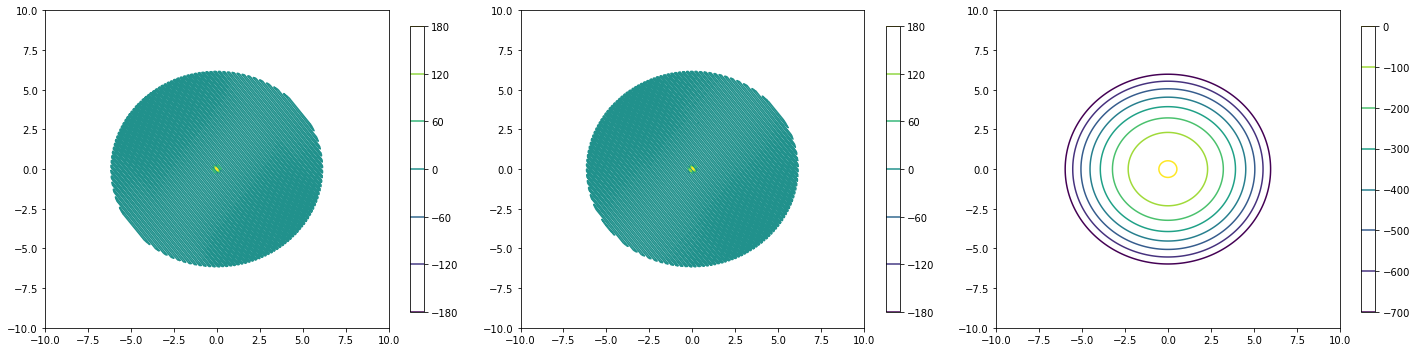

In [59]:
fig, ax = plt.subplots(1,3)

my_countor = ax[0].contour(X,Y,G_fft_model.real,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[0], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[1].contour(X,Y,G_fft_model.imag,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[1], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[2].contour(X,Y,np.log(np.abs(G_fft_model)),
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[2], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

fig.set_figheight(5)
fig.set_figwidth(20)
plt.tight_layout()

plt.show(fig)

In [63]:
from scipy import ndimage

G_model = np.fft.ifft2(G_fft_model)
G_model = np.fft.fftshift(G_model)
G_model = ndimage.rotate(G_model, 90*3)
plt.imshow(np.abs(G_model))
plt.title('Reconstructed using model')
plt.show()

plt.imshow(G)
plt.title('Pixel Image')
plt.show()

TypeError: Complex type not supported